In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('Data.dat' , delimiter = '\t' , header = None)

In [3]:
df_raw.head()


,0
0,DatTime SimTime MediaTime LonAccel LatAccel Th...
1,0.016 0 0.133333 0.000448 0.001680 1.308809 0....
2,0.033 0 0.133333 0.000700 0.018673 1.308809 0....
3,0.049 0 0.166666 0.000808 0.030992 1.308809 0....
4,0.065 0 0.166666 0.000791 0.037267 1.308809 0....


In [4]:
columns = df_raw.iloc[0,0].split()
df = pd.DataFrame(df_raw[0].str.split().tolist() , columns = columns)

In [5]:
df.head()

,DatTime,SimTime,MediaTime,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadwayDistance,...,FollowCarBrakingStatus,BoxStatus,ResponseButton,CriticalEventStatus,FRAME_NUM,FILTERED_GAZE_OBJ_NAME,ESTIMATED_CLOSEST_WORLD_INTERSECTION,REALTIME_CLOCK,hiFileTime,lowFileTime
0,DatTime,SimTime,MediaTime,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadwayDistance,...,FollowCarBrakingStatus,BoxStatus,ResponseButton,CriticalEventStatus,FRAME_NUM,FILTERED_GAZE_OBJ_NAME,ESTIMATED_CLOSEST_WORLD_INTERSECTION,REALTIME_CLOCK,hiFileTime,lowFileTime
1,0.016,0,0.133333,0.000448,0.001680,1.308809,0.000000,0.000000,359.999687,91.047424,...,0.000000,0.000000,0.000000,0.000000,.,.,.,.,.,.
2,0.033,0,0.133333,0.000700,0.018673,1.308809,0.000000,0.000000,359.999555,91.046936,...,0.000000,0.000000,0.000000,0.000000,.,.,.,.,.,.
3,0.049,0,0.166666,0.000808,0.030992,1.308809,0.000000,0.000000,359.999391,91.045715,...,0.000000,0.000000,0.000000,0.000000,.,.,.,.,.,.
4,0.065,0,0.166666,0.000791,0.037267,1.308809,0.000000,0.000000,359.999225,91.044128,...,0.000000,0.000000,0.000000,0.000000,.,.,.,.,.,.


In [6]:
df = df.drop(df.index[0])
df = df.reset_index(drop=True)

for col in df :
    df[col] = pd.to_numeric(df[col], errors='coerce')


df.head()

,DatTime,SimTime,MediaTime,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadwayDistance,...,FollowCarBrakingStatus,BoxStatus,ResponseButton,CriticalEventStatus,FRAME_NUM,FILTERED_GAZE_OBJ_NAME,ESTIMATED_CLOSEST_WORLD_INTERSECTION,REALTIME_CLOCK,hiFileTime,lowFileTime
0,0.016,0,0.133333,0.000448,0.001680,1.308809,0.0,0.0,359.999687,91.047424,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.033,0,0.133333,0.000700,0.018673,1.308809,0.0,0.0,359.999555,91.046936,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.049,0,0.166666,0.000808,0.030992,1.308809,0.0,0.0,359.999391,91.045715,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.065,0,0.166666,0.000791,0.037267,1.308809,0.0,0.0,359.999225,91.044128,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.082,0,0.200000,0.000659,0.037458,1.308809,0.0,0.0,359.999085,91.042297,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['SuddenBrake'] = (df['Brake'].diff() > 0.5).astype(int) 

In [8]:
features = ["LatAccel", "Throttle", "Brake", "Steer" ,"SuddenBrake"]

# #DRIVER RISK 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [10]:
n_clusters = 3

In [11]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [12]:
df["cluster"] = kmeans.labels_

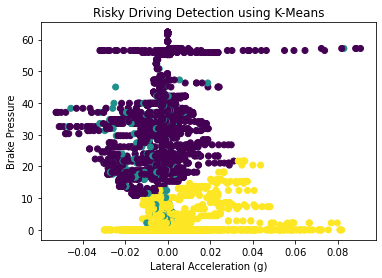

In [13]:
plt.scatter(df["LatAccel"], df["Brake"], c=df["cluster"], cmap="viridis")
plt.xlabel("Lateral Acceleration (g)")
plt.ylabel("Brake Pressure")
plt.title("Risky Driving Detection using K-Means")
plt.show()

In [14]:
# Interpretation 1.RISKY DRIVING :

'''The plot shows data points (drivers) scattered based on their lateral acceleration and brake pressure. K-Means identifies three clusters (represented by different colors). 

* **Cluster 1 (green):** This cluster might represent **normal driving** with moderate lateral acceleration and brake usage.
* **Cluster 2 (yellow):** This cluster might represent **potentially risky driving** with higher lateral acceleration or brake usage compared to cluster 1.
* **Cluster 3 (blue):** This cluster might represent **highly risky driving** with extreme lateral acceleration or brake usage, suggesting aggressive maneuvers or emergency situations.

'''

'The plot shows data points (drivers) scattered based on their lateral acceleration and brake pressure. K-Means identifies three clusters (represented by different colors). \n\n* **Cluster 1 (green):** This cluster might represent **normal driving** with moderate lateral acceleration and brake usage.\n* **Cluster 2 (yellow):** This cluster might represent **potentially risky driving** with higher lateral acceleration or brake usage compared to cluster 1.\n* **Cluster 3 (blue):** This cluster might represent **highly risky driving** with extreme lateral acceleration or brake usage, suggesting aggressive maneuvers or emergency situations.\n\n'

# #SIMULATED DRIVING ENVIRONMENT RISK

In [15]:
features = ["HeadwayDistance", "LeadVehPosX", "LaneOffset"]  
target = "HeadwayTime" 

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


In [17]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
y_pred = model.predict(X_test)
print(X_test)

       HeadwayDistance  LeadVehPosX  LaneOffset
1227         68.152198    14.499998   -0.530759
14689     10000.000000     2.302970   -0.702285
27310     10000.000000     2.302970   -0.356143
16996     10000.000000     2.302970   -1.012521
14092     10000.000000     2.302970   -0.648904
...                ...          ...         ...
14401     10000.000000     2.302970   -0.410961
24455     10000.000000     2.302970   -0.302766
23110     10000.000000     2.302970   -0.282321
15018     10000.000000     2.302970   -0.321659
20292     10000.000000     2.302970   -0.320311

[5550 rows x 3 columns]


In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.1916138709170856e+25


In [21]:
#Using unsupervised learning to look for unsafe simulated environments

In [20]:
features = ["HeadwayDistance", "LeadVehPosX", "LaneOffset"]

In [21]:
n_clusters = 3  # Experiment with different values
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df[features])

KMeans(n_clusters=3, random_state=42)

In [22]:
df["cluster"] = kmeans.labels_
#assuming lower HeadwayDistance indicates higher risk
cluster_risks = df.groupby("cluster")["HeadwayDistance"].mean()
print(f"Average HeadwayDistance by Cluster: {cluster_risks}")

print("The cluster with the least average HeadwayDistance is under hisher risk")

Average HeadwayDistance by Cluster: cluster
0    10000.000000
1       51.878837
2      225.987269
Name: HeadwayDistance, dtype: float64
The cluster with the least average HeadwayDistance is under hisher risk


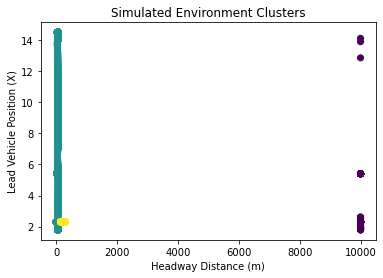

In [23]:
# Visualize clusters (optional)
import matplotlib.pyplot as plt

plt.scatter(df["HeadwayDistance"], df["LeadVehPosX"], c=df["cluster"], cmap="viridis")
plt.xlabel("Headway Distance (m)")
plt.ylabel("Lead Vehicle Position (X)")
plt.title("Simulated Environment Clusters")
plt.show()

In [26]:
# Interpretation 2.SIMULATED DRIVING ENVIRONMENT RISK  :

'''By analyzing the distribution of clusters, we can potentially gain insights into 
risk levels in the simulated environment. For example, a cluster with data points 
concentrated in the lower region of the Headway Distance axis might represent 
situations with a higher risk of collision due to closer proximity to leading vehicles.

K-Means can not predict the exact risk but with further study and domain knowledge
better risk assesment stategies can be made.

'''


'By analyzing the distribution of clusters, we can potentially gain insights into \nrisk levels in the simulated environment. For example, a cluster with data points \nconcentrated in the lower region of the Headway Distance axis might represent \nsituations with a higher risk of collision due to closer proximity to leading vehicles.\n\nK-Means can not predict the exact risk but with further study and domain knowledge\nbetter risk assesment stategies can be made.\n\n'

# #DRIVER ATTENTION 

In [24]:
'''attentiveness_clusters = KMeans(n_clusters=3, random_state=42).fit_predict(data[["BLINKING", "LEFTEYELIDSTATE"]])
print("Attentiveness Clusters:", attentiveness_clusters)'''


#UNABLE TO PROCEED WITH THE ABOVE FEATURES SISNCE THEY ARE EMPTY

#"None of [Index(['BLINKING', 'LEFTEYELIDSTATE'], dtype='object')] are in the [columns]"

'attentiveness_clusters = KMeans(n_clusters=3, random_state=42).fit_predict(data[["BLINKING", "LEFTEYELIDSTATE"]])\nprint("Attentiveness Clusters:", attentiveness_clusters)'

In [25]:
features = [  "LaneOffset", "Throttle"]

In [26]:
attentiveness_clusters = KMeans(n_clusters=3, random_state=42).fit_predict(df[features])
print("Attentiveness Clusters:", attentiveness_clusters)

Attentiveness Clusters: [2 2 2 ... 2 2 2]


In [27]:
cluster_lane_offsets = df.groupby(attentiveness_clusters)["LaneOffset"].mean().abs()
print("Average Lane Offset by Cluster:", cluster_lane_offsets)

Average Lane Offset by Cluster: 0    0.363361
1    0.598526
2    0.388819
Name: LaneOffset, dtype: float64


In [28]:
from sklearn.ensemble import IsolationForest
# Anomaly detection
anomaly_detector = IsolationForest()
anomaly_scores = anomaly_detector.fit_predict(df[features])
df["anomaly_score"] = anomaly_scores

In [29]:
# Identify potential outliers (high anomaly scores)
potential_distracted_drivers = df[df["anomaly_score"] > 0.8]  # Adjust threshold as needed

print("Potential Distracted Drivers (based on anomaly scores):")
print(potential_distracted_drivers[features])  



Potential Distracted Drivers (based on anomaly scores):
       LaneOffset  Throttle
472     -0.054606  7.942294
473     -0.055667  7.942294
474     -0.056740  7.942294
475     -0.057823  7.942294
476     -0.058917  7.942294
...           ...       ...
27745   -0.356143  1.308809
27746   -0.356143  1.308809
27747   -0.356143  1.308809
27748   -0.356143  1.308809
27749   -0.356143  1.308809

[23036 rows x 2 columns]


# # 4. Driver DROWSINESS WITHOUT USING VIDEO FILE



In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [31]:
def classify_drowsiness(data):
    # Replace with your drowsiness classification model
    drowsiness_level = "Undetermined"
    return drowsiness_level

In [32]:
X = df.drop(["BLINKING"], axis=1)
y = df["BLINKING"]

In [33]:
y

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
27745   NaN
27746   NaN
27747   NaN
27748   NaN
27749   NaN
Name: BLINKING, Length: 27750, dtype: float64

In [34]:
#can not do because the blinking data is empty (supervides learning not possible)

In [35]:
df.head()

,DatTime,SimTime,MediaTime,LonAccel,LatAccel,Throttle,Brake,Gear,Heading,HeadwayDistance,...,CriticalEventStatus,FRAME_NUM,FILTERED_GAZE_OBJ_NAME,ESTIMATED_CLOSEST_WORLD_INTERSECTION,REALTIME_CLOCK,hiFileTime,lowFileTime,SuddenBrake,cluster,anomaly_score
0,0.016,0,0.133333,0.000448,0.001680,1.308809,0.0,0.0,359.999687,91.047424,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,-1
1,0.033,0,0.133333,0.000700,0.018673,1.308809,0.0,0.0,359.999555,91.046936,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,-1
2,0.049,0,0.166666,0.000808,0.030992,1.308809,0.0,0.0,359.999391,91.045715,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,-1
3,0.065,0,0.166666,0.000791,0.037267,1.308809,0.0,0.0,359.999225,91.044128,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,-1
4,0.082,0,0.200000,0.000659,0.037458,1.308809,0.0,0.0,359.999085,91.042297,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,-1


In [43]:
'''features = ['LonAccel', 'LatAccel', 'Throttle', 'Brake', 'Velocity', 'BLINKING', 'LEFTEYELIDSTATE', 'RIGHTEYELIDSTATE']
X = df[features]
X.fillna(0, inplace=True)
X_normalized = (X - X.mean()) / X.std()
kmeans = KMeans(n_clusters=2)  #2 clusters for awake vs. drowsy
clusters = kmeans.fit_predict(X_normalized)
ValueError                                Traceback (most recent call last)
Input In [56], in <cell line: 6>()
      4 X_normalized = (X - X.mean()) / X.std()
      5 kmeans = KMeans(n_clusters=2)  #2 clusters for awake vs. drowsy
----> 6 clusters = kmeans.fit_predict(X_normalized)

File ~\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255, in KMeans.fit_predict(self, X, y, sample_weight)
   1232 def fit_predict(self, X, y=None, sample_weight=None):
   1233     """Compute cluster centers and predict cluster index for each sample.
   1234 
   1235     Convenience method; equivalent to calling fit(X) followed by
   (...)
   1253         Index of the cluster each sample belongs to.
   1254     """
-> 1255     return self.fit(X, sample_weight=sample_weight).labels_

File ~\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1137, in KMeans.fit(self, X, y, sample_weight)
   1111 def fit(self, X, y=None, sample_weight=None):
   1112     """Compute k-means clustering.
   1113 
   1114     Parameters
   (...)
   1135         Fitted estimator.
   1136     """
-> 1137     X = self._validate_data(
   1138         X,
   1139         accept_sparse="csr",
   1140         dtype=[np.float64, np.float32],
   1141         order="C",
   1142         copy=self.copy_x,
   1143         accept_large_sparse=False,
   1144     )
   1146     self._check_params(X)
   1147     random_state = check_random_state(self.random_state)

File ~\anaconda3\lib\site-packages\sklearn\base.py:566, in BaseEstimator._validate_data(self, X, y, reset, validate_separately, **check_params)
    564     raise ValueError("Validation should be done on X, y or both.")
    565 elif not no_val_X and no_val_y:
--> 566     X = check_array(X, **check_params)
    567     out = X
    568 elif no_val_X and not no_val_y:

File ~\anaconda3\lib\site-packages\sklearn\utils\validation.py:800, in check_array(array, accept_sparse, accept_large_sparse, dtype, order, copy, force_all_finite, ensure_2d, allow_nd, ensure_min_samples, ensure_min_features, estimator)
    794         raise ValueError(
    795             "Found array with dim %d. %s expected <= 2."
    796             % (array.ndim, estimator_name)
    797         )
    799     if force_all_finite:
--> 800         _assert_all_finite(array, allow_nan=force_all_finite == "allow-nan")
    802 if ensure_min_samples > 0:
    803     n_samples = _num_samples(array)

File ~\anaconda3\lib\site-packages\sklearn\utils\validation.py:114, in _assert_all_finite(X, allow_nan, msg_dtype)
    107     if (
    108         allow_nan
    109         and np.isinf(X).any()
    110         or not allow_nan
    111         and not np.isfinite(X).all()
    112     ):
    113         type_err = "infinity" if allow_nan else "NaN, infinity"
--> 114         raise ValueError(
    115             msg_err.format(
    116                 type_err, msg_dtype if msg_dtype is not None else X.dtype
    117             )
    118         )
    119 # for object dtype data, we only check for NaNs (GH-13254)
    120 elif X.dtype == np.dtype("object") and not allow_nan:

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').



CAN NOT PROCEED BECAUSE OF NULL VALUES '''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2158-2159: truncated \uXXXX escape (2655315645.py, line 79)